In [ ]:
import pandas as pd

In [ ]:
data=pd.read_excel('./Q1/Catamarans/Catamarans.xlsx')
data.head()

In [ ]:
data.shape

In [ ]:
data.columns

In [ ]:
temp=data[['Length \n(ft)', 'Listing Price (USD)', 'Year', 
       'LWL (ft)', 'Beam (ft)', 'Draft (ft)', 'Displacement (lbs)',
       'Sail Area (sq ft)',  'Average cargo throughput (tons)',
       'GDP (USD billion)', 'GDP per capita (USD)',
       'Average ratio of total logistics costs to GDP']].copy()

In [ ]:
temp.head()

In [ ]:
temp.isnull().sum()

In [ ]:
index_d=temp.dropna().index
temp.dropna(inplace=True)
temp.reset_index(inplace=True,drop=True)

In [ ]:
temp.isnull().sum()

In [ ]:
temp['Year']=temp['Year'].astype('int')

In [ ]:
temp.dtypes

In [ ]:
temp['Year']=temp['Year'].astype(int)

In [ ]:
temp.columns=['Length(ft)', 'Listing Price (USD)', 'Year', 
       'LWL (ft)', 'Beam (ft)', 'Draft (ft)', 'Displacement (lbs)',
       'Sail Area (sq ft)', 'Average Cargo Throughput (tons)', 'GDP (bn)',
       'GDP per capita', 'logistics costs to GDP%']

In [ ]:
temp.to_excel('./Q3/Catamarans/temp.xlsx',index=None)

In [ ]:
# 此处所引入的包大部分为下文机器学习算法
import pandas as pd
from numpy import *
import numpy as np
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

import xgboost as xgb
import lightgbm as lgb
import numpy as np


import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error,r2_score

import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) 
X=temp[['Length(ft)',  'Year', 
       'LWL (ft)', 'Beam (ft)', 'Draft (ft)', 'Displacement (lbs)',
       'Sail Area (sq ft)',  'GDP (bn)',
       'GDP per capita']]
Y=temp['Listing Price (USD)']

tr_x,te_x,tr_y,te_y=train_test_split(X ,Y,test_size=0.1,random_state=5)


model=MLPRegressor(hidden_layer_sizes=10,max_iter=1000).fit(tr_x,tr_y)

y_pred=model.predict(te_x)
print("神经网络:")
print("训练集平均绝对百分比误差:{:.3f}".format(mape(model.predict(tr_x),tr_y)))
print("测试集平均绝对百分比误差:{:.3f}".format(mape(model.predict(te_x),te_y)))
print("r2_score",r2_score(te_y,y_pred))
print(X.columns)

In [ ]:
X.shape

In [ ]:


print("\n线性回归:")
logreg = LinearRegression()
logreg.fit(tr_x, tr_y)
y_pred = logreg.predict(te_x)
print("训练集平均绝对百分比误差:{:.3f}".format(mape(logreg.predict(tr_x),tr_y)))
print("测试集平均绝对百分比误差:{:.3f}".format(mape(logreg.predict(te_x),te_y)))
print("平均绝对误差:",mean_absolute_error(te_y, y_pred))
print("r2_score",r2_score(te_y,y_pred))
      
print("\n决策树回归:")
tree=DecisionTreeRegressor(max_depth=50,random_state=0)
tree.fit(tr_x,tr_y)
y_pred = tree.predict(te_x)
print("训练集平均绝对百分比误差:{:.3f}".format(mape(tree.predict(tr_x),tr_y)))
print("测试集平均绝对百分比误差:{:.3f}".format(mape(tree.predict(te_x),te_y)))

print("r2_score",r2_score(te_y,y_pred))
      
      
print("\n随机森林回归:")
rf=RandomForestRegressor(max_depth=20,n_estimators=1000,random_state=0)
rf.fit(tr_x,tr_y)

y_pred = rf.predict(te_x)

print("训练集平均绝对百分比误差:{:.3f}".format(mape(rf.predict(tr_x),tr_y)))
print("测试集平均绝对百分比误差:{:.3f}".format(mape(rf.predict(te_x),te_y)))

print("r2_score",r2_score(te_y,y_pred))
      

print("\nLGBM回归:")
lgb_model=lgb.LGBMRegressor()
lgb_model.fit(tr_x,tr_y)
y_pred = lgb_model.predict(te_x)
print("训练集平均绝对百分比误差:{:.3f}".format(mape(lgb_model.predict(tr_x),tr_y)))
print("测试集平均绝对百分比误差:{:.3f}".format(mape(lgb_model.predict(te_x),te_y)))

print("r2_score",r2_score(te_y,y_pred))


print("\nXGBOOST回归:")
xgb_model=xgb.XGBRegressor()
xgb_model.fit(tr_x,tr_y)
y_pred = xgb_model.predict(te_x)
print("训练集平均绝对百分比误差:{:.3f}".format(mape(xgb_model.predict(tr_x),tr_y)))
print("测试集平均绝对百分比误差:{:.3f}".format(mape(xgb_model.predict(te_x),te_y)))

print("r2_score",r2_score(te_y,y_pred))

In [ ]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


# 学习曲线函数

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("game num")
    plt.ylabel("score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    plt.savefig('./Q3/Catamarans/%s.jpg'%title)
    plt.legend(loc="best")
    plt.show()
    return plt

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
plot_learning_curve(logreg, "LineRegression", tr_x, tr_y, ylim=None, cv=cv, n_jobs=1)
plot_learning_curve(tree, "DecisionTreeClassifier", tr_x, tr_y, ylim=None, cv=None, n_jobs=1)
plot_learning_curve(rf, "RandomForestClassifier", tr_x, tr_y, ylim=None, cv=None, n_jobs=1)
plot_learning_curve(model, "MLPClassifier", tr_x, tr_y, ylim=None, cv=None, n_jobs=1)
plot_learning_curve(lgb_model, "LGBM", tr_x, tr_y, ylim=None, cv=None, n_jobs=1)
plot_learning_curve(xgb_model, "XGBOOST", tr_x, tr_y, ylim=None, cv=None, n_jobs=1)


In [ ]:
import sys
!{sys.executable} -m pip install shap -i https://pypi.tuna.tsinghua.edu.cn/simple

In [ ]:
import shap
shap.initjs()  # notebook环境下，加载用于可视化的JS代码
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X)  # 传入特征矩阵X，计算SHAP值

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams["font.sans-serif"]=["SimHei"] #设置字体
plt.rcParams["axes.unicode_minus"]=False #正常显示负号
# summarize the effects of all the features
shap.summary_plot(shap_values, X)

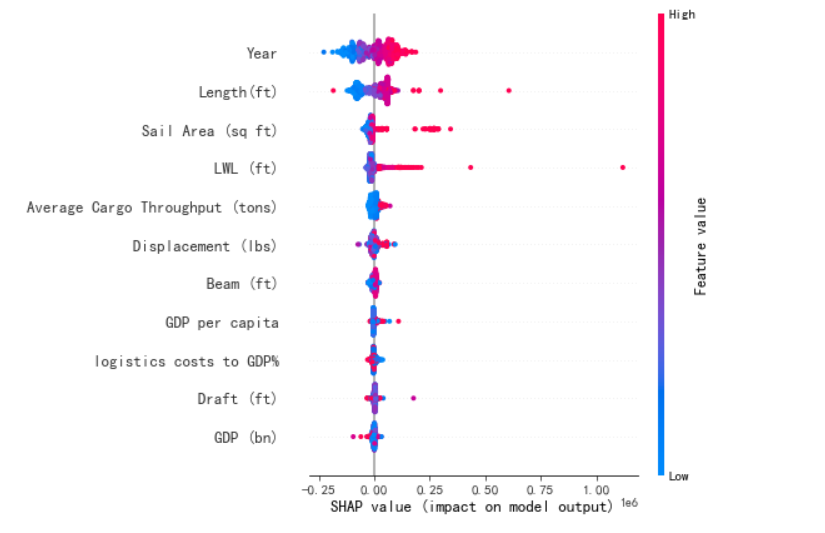

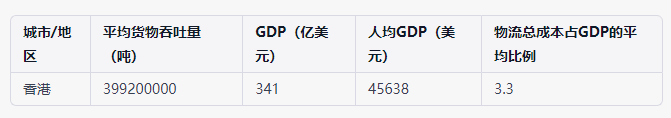

In [ ]:
echk = pd.read_excel('./Q3/Ecmy-HngKong.xlsx')
echk.columns=['Year','Average cargo throughput (tons)', 'GDP (USD billion)',
       'GDP per capita (USD)', 'logistics costs to GDP%']

In [ ]:
temp.head()


In [ ]:
HKData=temp[['Length(ft)', 'Listing Price (USD)', 'Year', 'LWL (ft)', 'Beam (ft)',
       'Draft (ft)', 'Displacement (lbs)', 'Sail Area (sq ft)']].copy()
# unique_years = HKData['Year'].unique()
# print(unique_years)
HKData.head()

In [ ]:
echk.head()

In [ ]:
HKData = pd.merge(HKData, echk, on='Year', how='outer')

In [ ]:
HKData.head()
HKData.isnull().sum()

In [ ]:
HKData.columns

In [ ]:
# temp是源数据，此cell是获得源数据拟合的模型

# X=temp[['Length(ft)',  'Year', 
#        'LWL (ft)', 'Beam (ft)', 'Draft (ft)', 'Displacement (lbs)',
#        'Sail Area (sq ft)', 'Average Cargo Throughput (tons)', 'GDP (bn)',
#        'GDP per capita', 'logistics costs to GDP%']]
# # X=temp[['Length(ft)',  'Year', 
# #        'LWL (ft)', 'Beam (ft)', 'Draft (ft)', 'Displacement (lbs)',
# #        'Sail Area (sq ft)', 'GDP (bn)']]
# Y=temp['Listing Price (USD)']

# lgb_model=lgb.LGBMRegressor()
# lgb_model.fit(X,Y)
# y_pred = lgb_model.predict(X)
# print("源数据：")
# print("平均绝对百分比误差:{:.3f}".format(mape(y_pred,Y)))

# print("r2_score",r2_score(y_pred,Y))

# 效果不好，注释带哦了

In [ ]:
X=HKData[['Length(ft)', 'Year', 
       'LWL (ft)', 'Beam (ft)', 'Draft (ft)', 'Displacement (lbs)',
       'Sail Area (sq ft)',  'Average cargo throughput (tons)',
       'GDP (USD billion)', 'GDP per capita (USD)','logistics costs to GDP%']]
# X=HKData[['Length(ft)', 'Year', 
#        'LWL (ft)', 'Beam (ft)', 'Draft (ft)', 'Displacement (lbs)',
#        'Sail Area (sq ft)', 'GDP (USD billion)']]
Y=HKData['Listing Price (USD)']
lgb_model=lgb.LGBMRegressor()
lgb_model.fit(X,Y)
y_pred = lgb_model.predict(X)
print("HK数据：")
print("平均绝对百分比误差:{:.3f}".format(mape(y_pred,Y)))

print("r2_score",r2_score(y_pred,Y))

In [ ]:
temp.head()

In [ ]:
DF=pd.DataFrame()

In [ ]:
DF['true_Price']=Y

In [ ]:
import numpy as np
np.set_printoptions(suppress=True)  # 取消科学计数法
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.1f' % x)

In [ ]:
y_pred = lgb_model.predict(HKData[X.columns])
DF['simulation_HK_Price']=y_pred

In [ ]:
DF['Country/Region/State']=data.iloc[index_d]['Country/Region/State '].values
DF['Make Variant']=data.iloc[index_d]['Make Variant'].values

In [ ]:
DF

In [ ]:
X.shape

In [ ]:
# 计算决定系数
r2 = r2_score(DF['true_Price'], DF['simulation_HK_Price'])
# 将结果添加到数据框中
DF['PPD'] = r2

In [ ]:
DF

In [ ]:
DF.to_excel('./Q3/Catamarans/shuang-HK-pipeidu.xlsx',index=None)

In [ ]:
DF.drop_duplicates(subset=['Country/Region/State','Make Variant'],keep='first').to_excel('./Q3/Catamarans/DF1.xlsx',index=None)